# Lab 4 - Hypothesis testing and statistical analysis

## Get the data (1 mark)

In [1]:
import pandas as pd

df = pd.read_csv("census11sample.csv")

## Divide the data (2 marks)

df.sample is used to randomise data when splitting the dataset, to reduce bias with random_state = 69 to allow reproducability

In [2]:
from sklearn.model_selection import train_test_split

# sample_test is formed by sampling from df, by 50%
# then drop the sample, not to be repeated in sample_explore
sample_test = df.sample(frac = 0.5, random_state = 69)
sample_explore = df.drop(sample_test.index)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Explore the data (5 marks)

In [3]:
# remove column 'Unnamed: 0', unrelevant for exploration
sample_explore.drop(columns = ['Unnamed: 0'], inplace = True)
sample_explore.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,41.410000,38.570000,39.486000,38.8640,39.746000,41.108000,36.156000,40.528000,43.16000
std,23.324192,23.789851,23.265347,23.5971,23.007655,24.111887,22.421711,23.049594,24.06351
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,23.000000,18.000000,20.750000,17.7500,20.000000,21.750000,19.000000,22.000000,22.00000
50%,42.000000,39.000000,39.000000,39.0000,40.000000,41.000000,34.000000,41.000000,43.00000
75%,58.250000,57.000000,58.000000,58.0000,58.000000,61.000000,51.000000,58.000000,61.00000
max,94.000000,94.000000,94.000000,95.0000,96.000000,95.000000,96.000000,95.000000,95.00000


### Box Plot

Text(0, 0.5, 'Age')

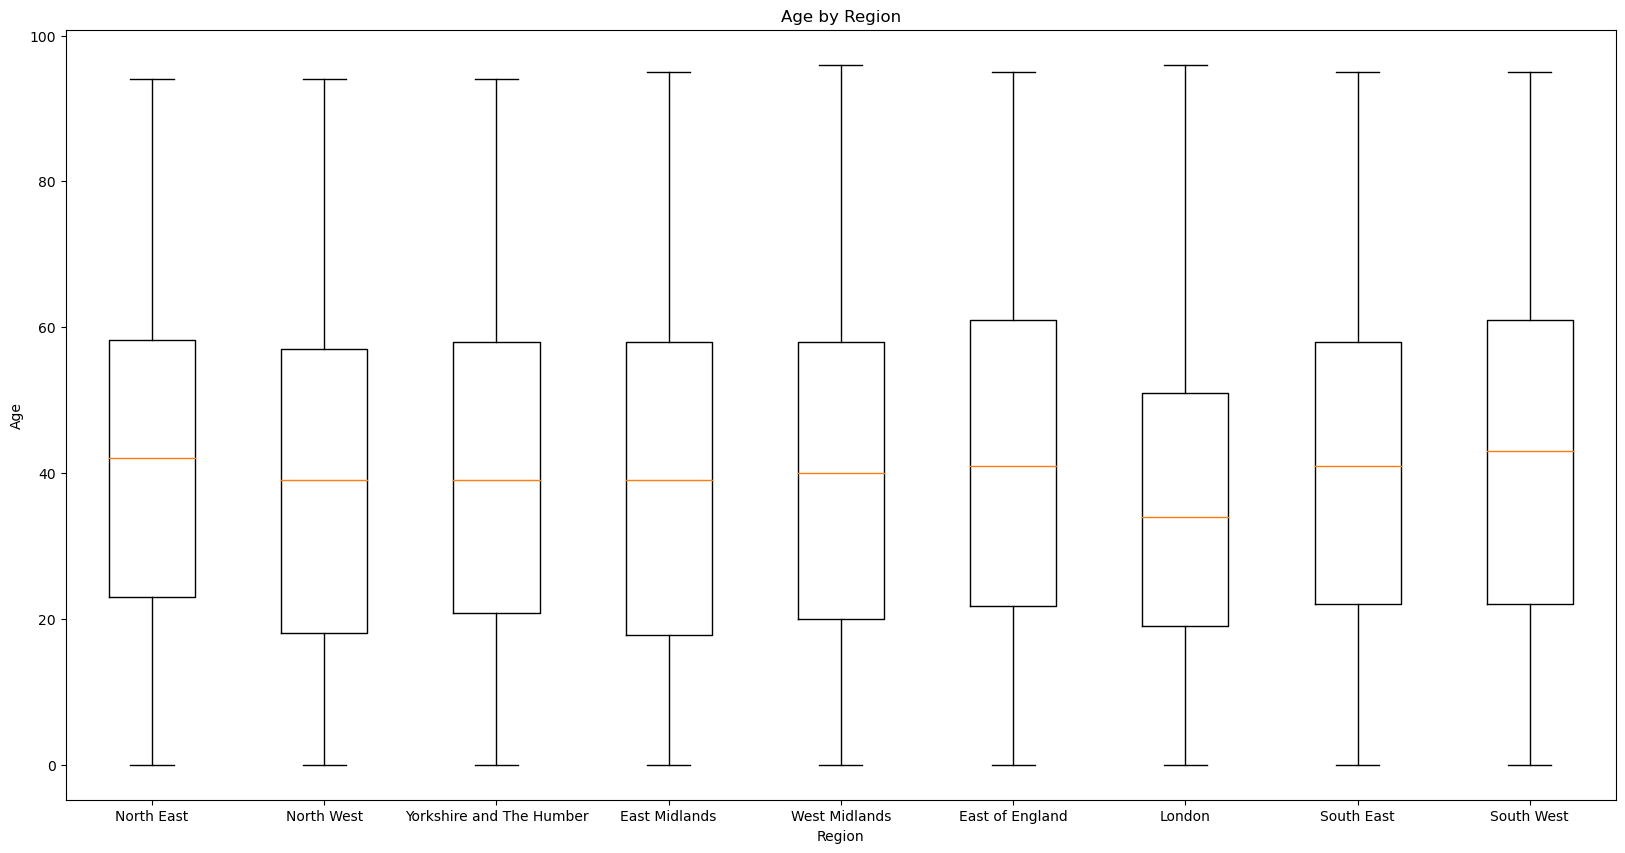

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.boxplot(sample_explore, labels = ["North East", "North West", "Yorkshire and The Humber", "East Midlands", "West Midlands", "East of England", "London", "South East", "South West"])
plt.title("Age by Region")
plt.xlabel("Region")
plt.ylabel("Age")

### Scatter Plot

In [5]:
def countplot(array) :
    counts = {}

    for i in range(101) :
        counts[i] = 0
    
    for i in array :
        counts[i] += 1
        
    return counts.values()

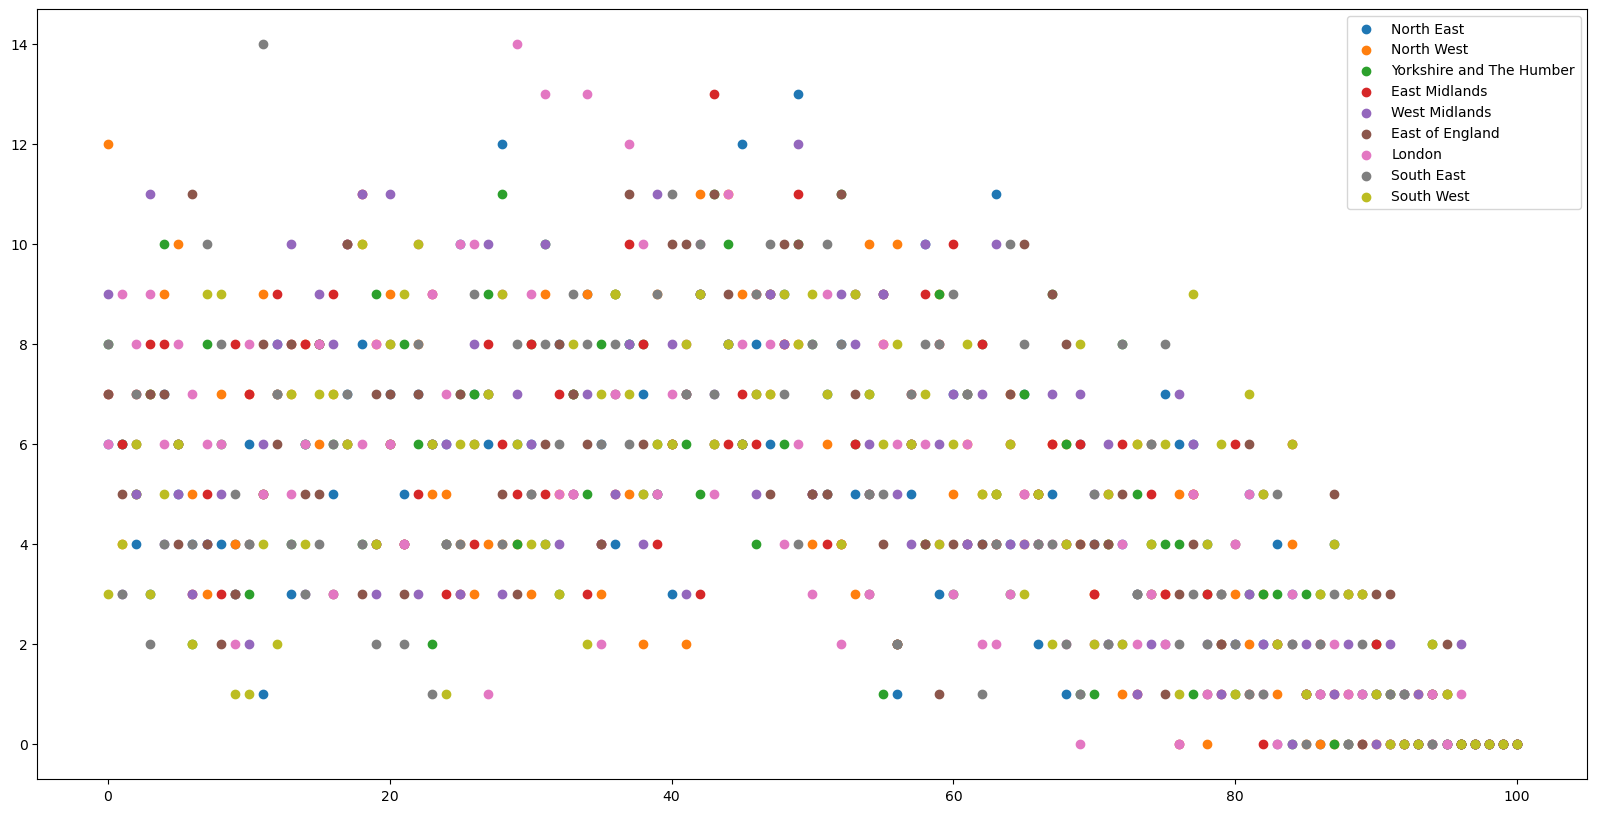

In [6]:
import numpy as np

plt.figure(figsize = (20,10))

regions = sample_explore.columns

for i in regions :
    plt.scatter(np.arange(0, 101, 1), countplot(sample_explore[i].values), label = i)

plt.legend()

Cannot get any meaningful information from the scatterplot, may need a better plotting

### Histogram

Individual data

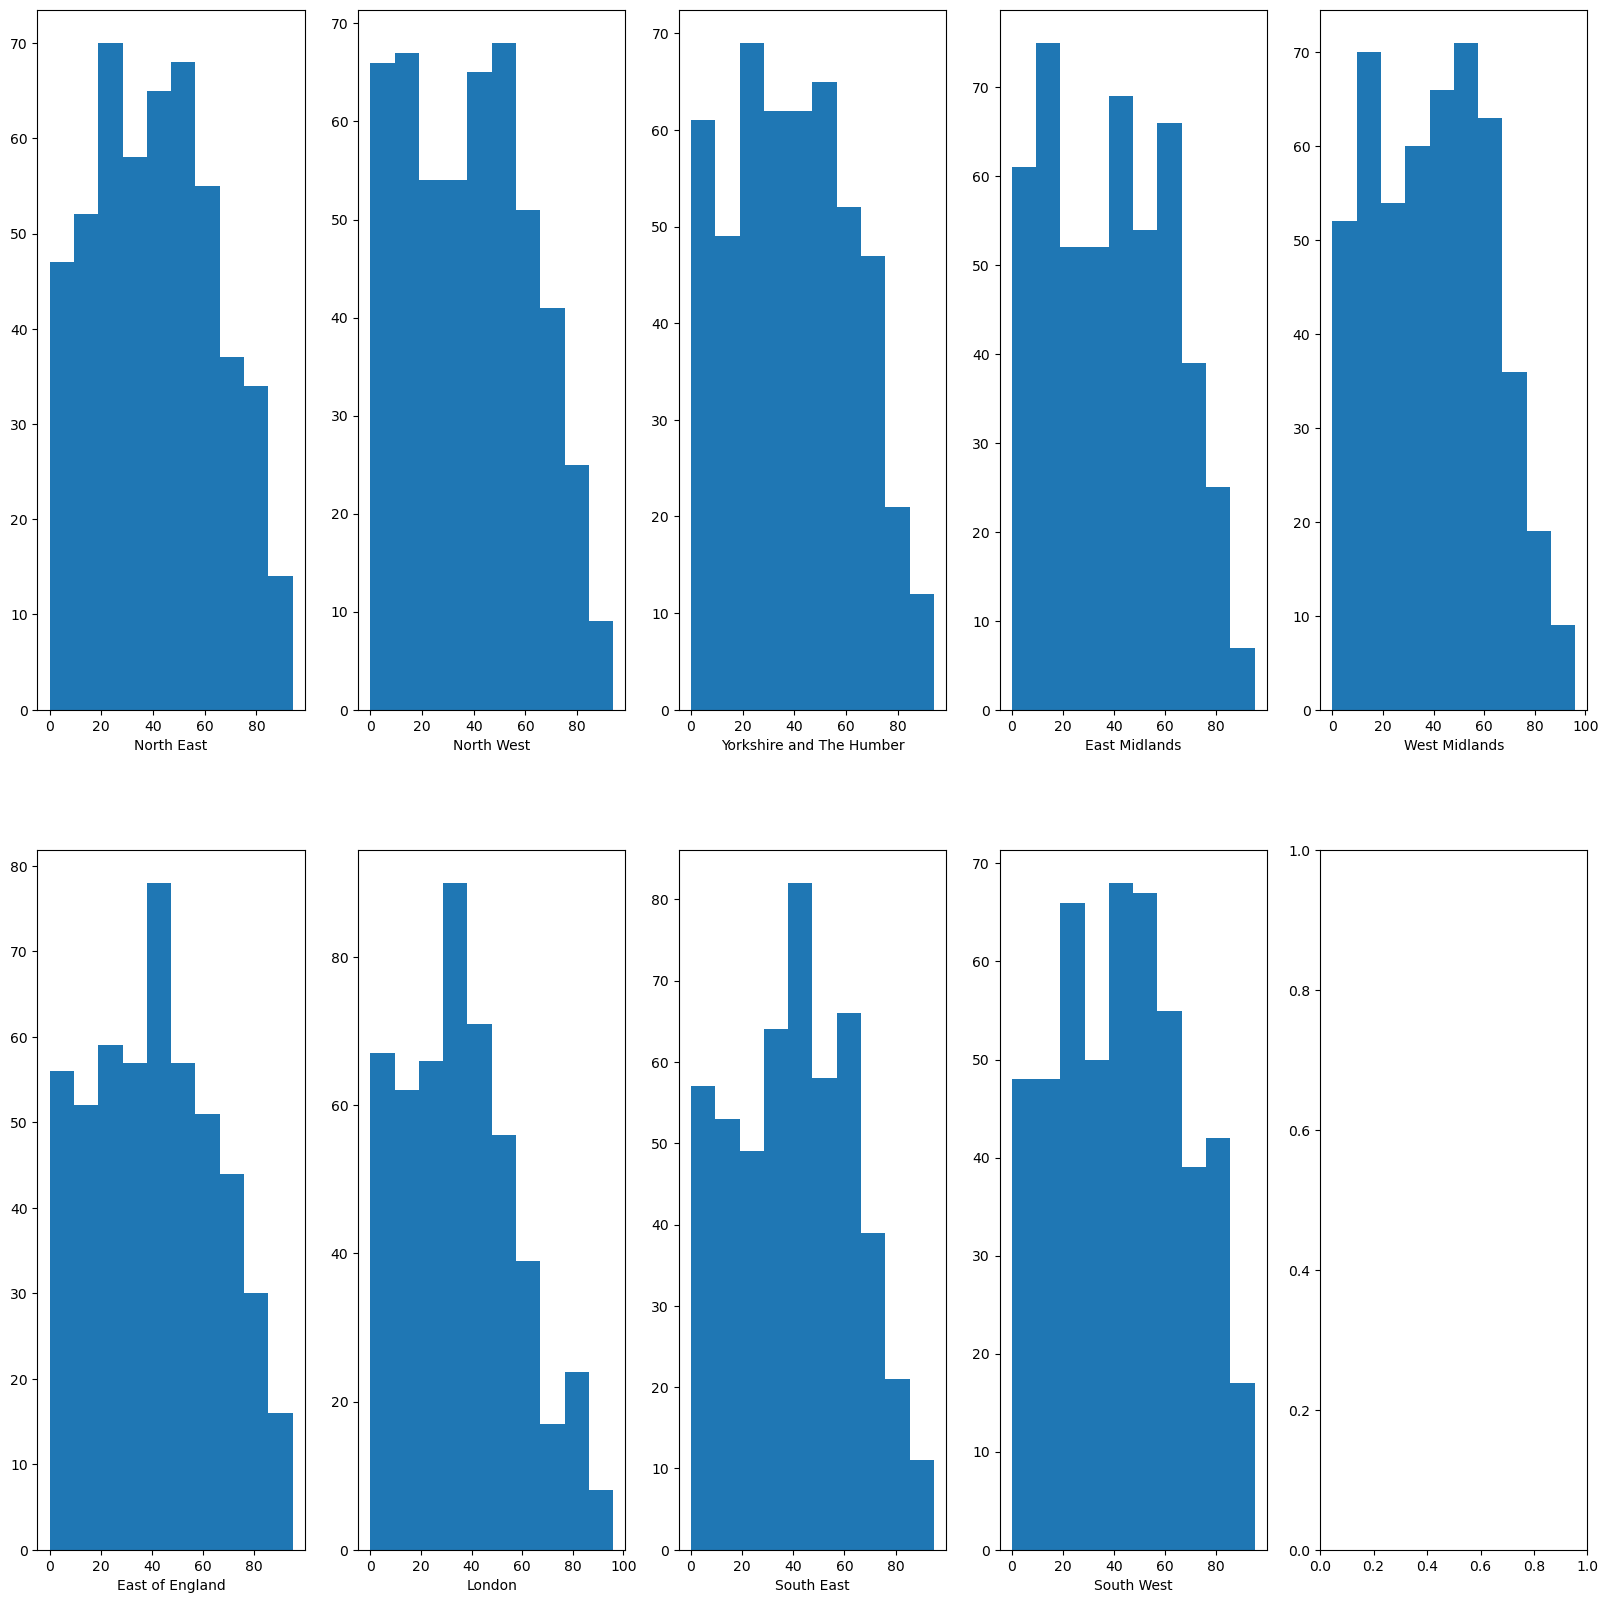

In [7]:
fig, axs = plt.subplots(2, 5, figsize = (20, 20))

for i in range(5) :
    axs[0, i].hist(sample_explore[regions[i]])
    axs[0, i].set_xlabel(regions[i])

for i in range(4) :
    axs[1, i].hist(sample_explore[regions[i + 1 + 4]])
    axs[1, i].set_xlabel(regions[i + 1 + 4])

Combined data

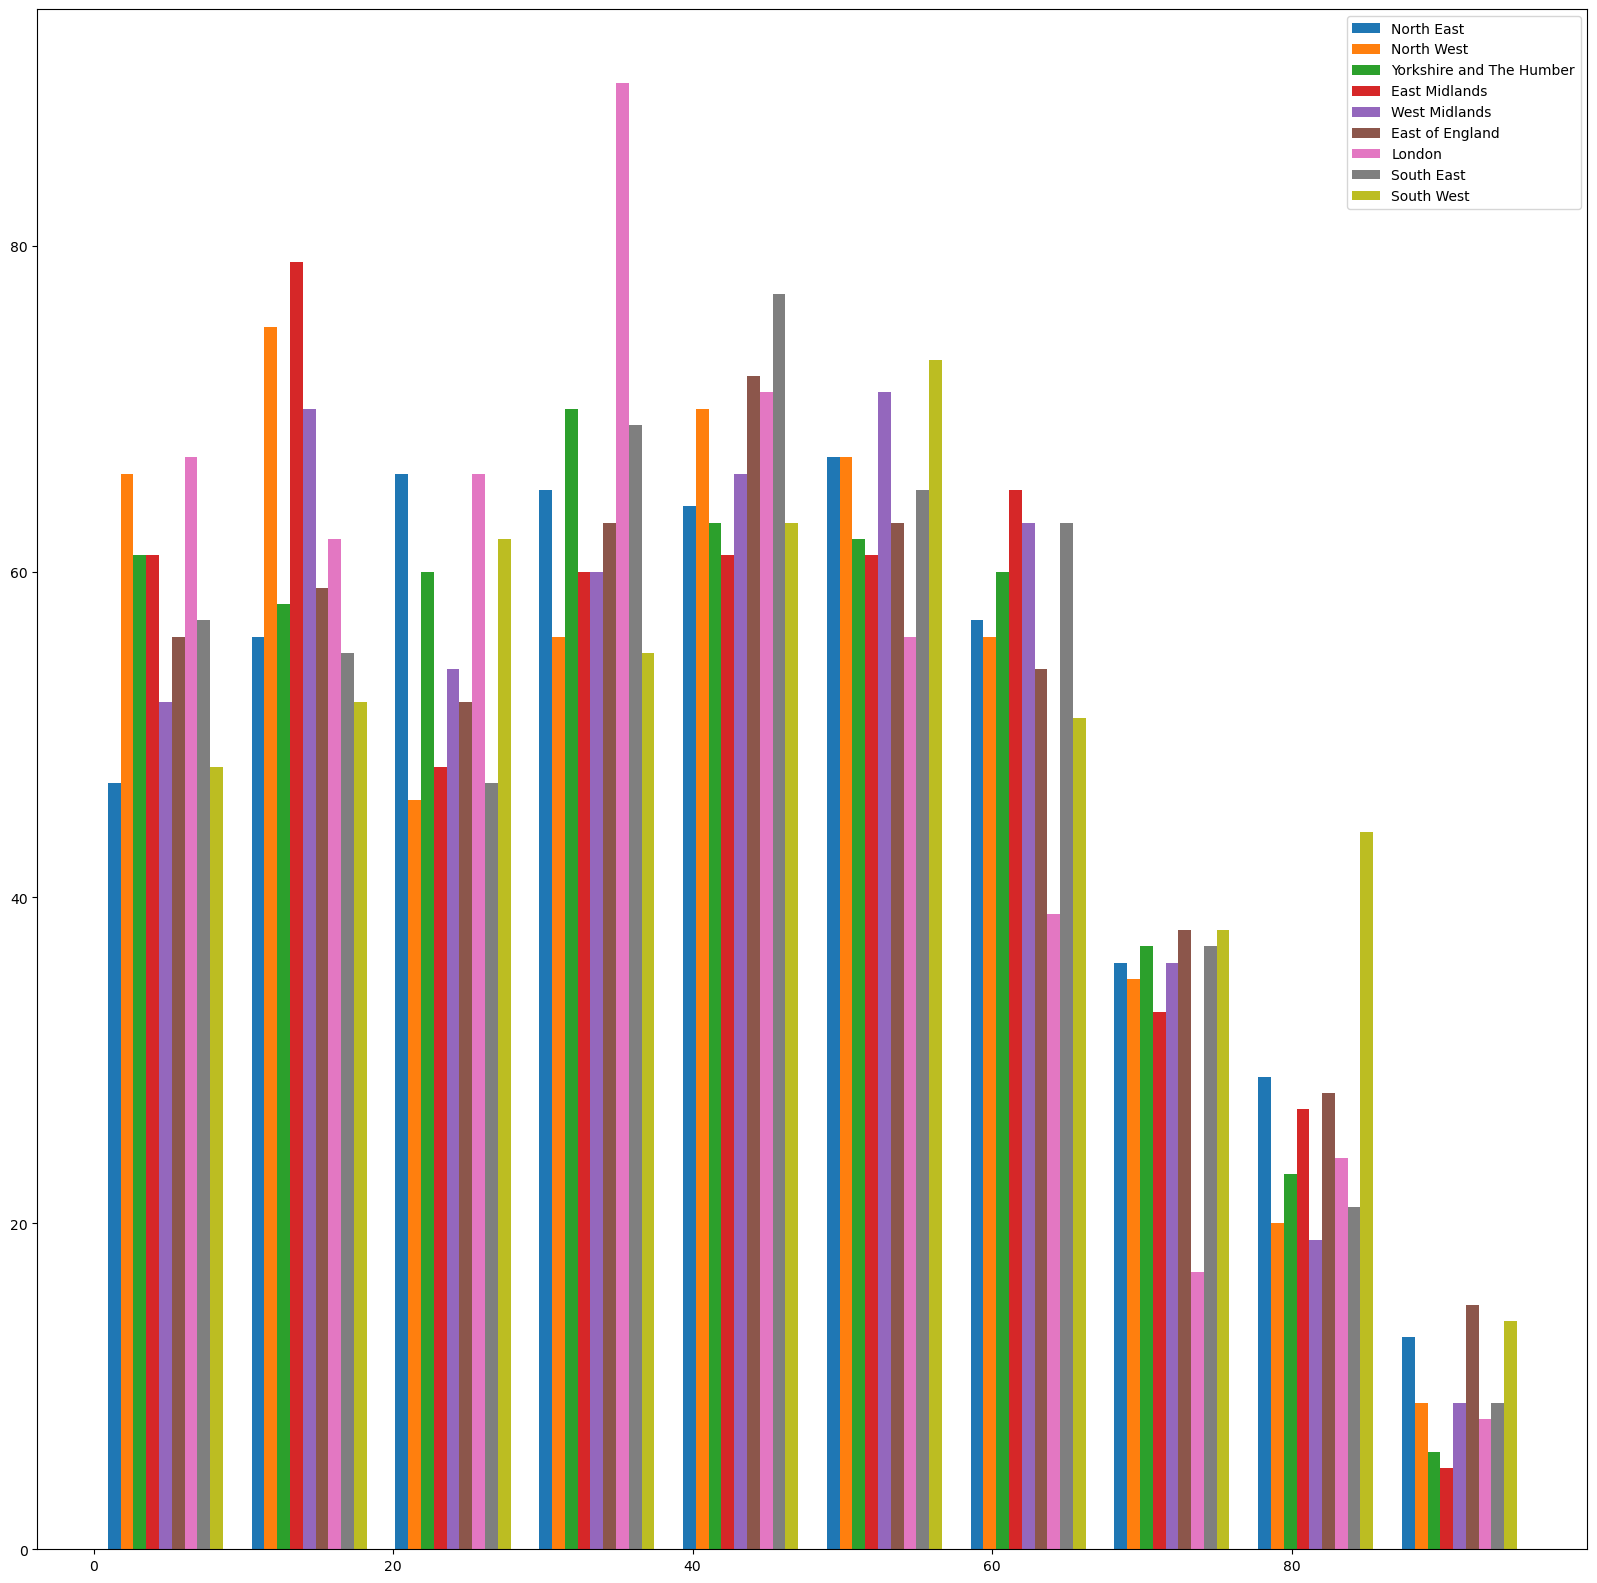

In [8]:
fig, axs = plt.subplots(figsize = (20, 20))
axs.hist(sample_explore, label = sample_explore.columns)
axs.legend()

### Counting the number of people >= 50 and number of people < 50

<BarContainer object of 2 artists>

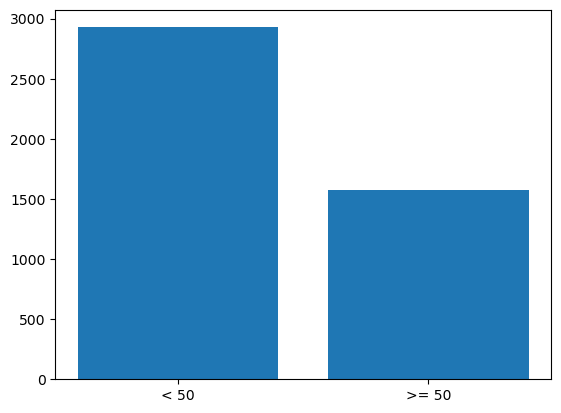

In [9]:
people_let_fifty = 0 # less than 50
people_geq_fifty = 0 # greater or equal to fifty

def counting_fifty(array) :

    global people_let_fifty
    global people_geq_fifty
    
    for i in array :
        if i < 50 :
            people_let_fifty += 1
        elif i >= 50 :
            people_geq_fifty += 1

for i in regions :
    counting_fifty(sample_explore[i])

plt.bar(["< 50", ">= 50"], [people_let_fifty, people_geq_fifty])

### Mean difference between regions

In [10]:
# print for difference is greater than 5
for i in regions :
    for j in regions :
        if (i != j) :
            if((sample_explore[i].mean() - sample_explore[j].mean()) > 5) :
                print(f"Difference between {i} and {j} is {sample_explore[i].mean() - sample_explore[j].mean()}")

Difference between North East and London is 5.253999999999998
Difference between South West and London is 7.003999999999998


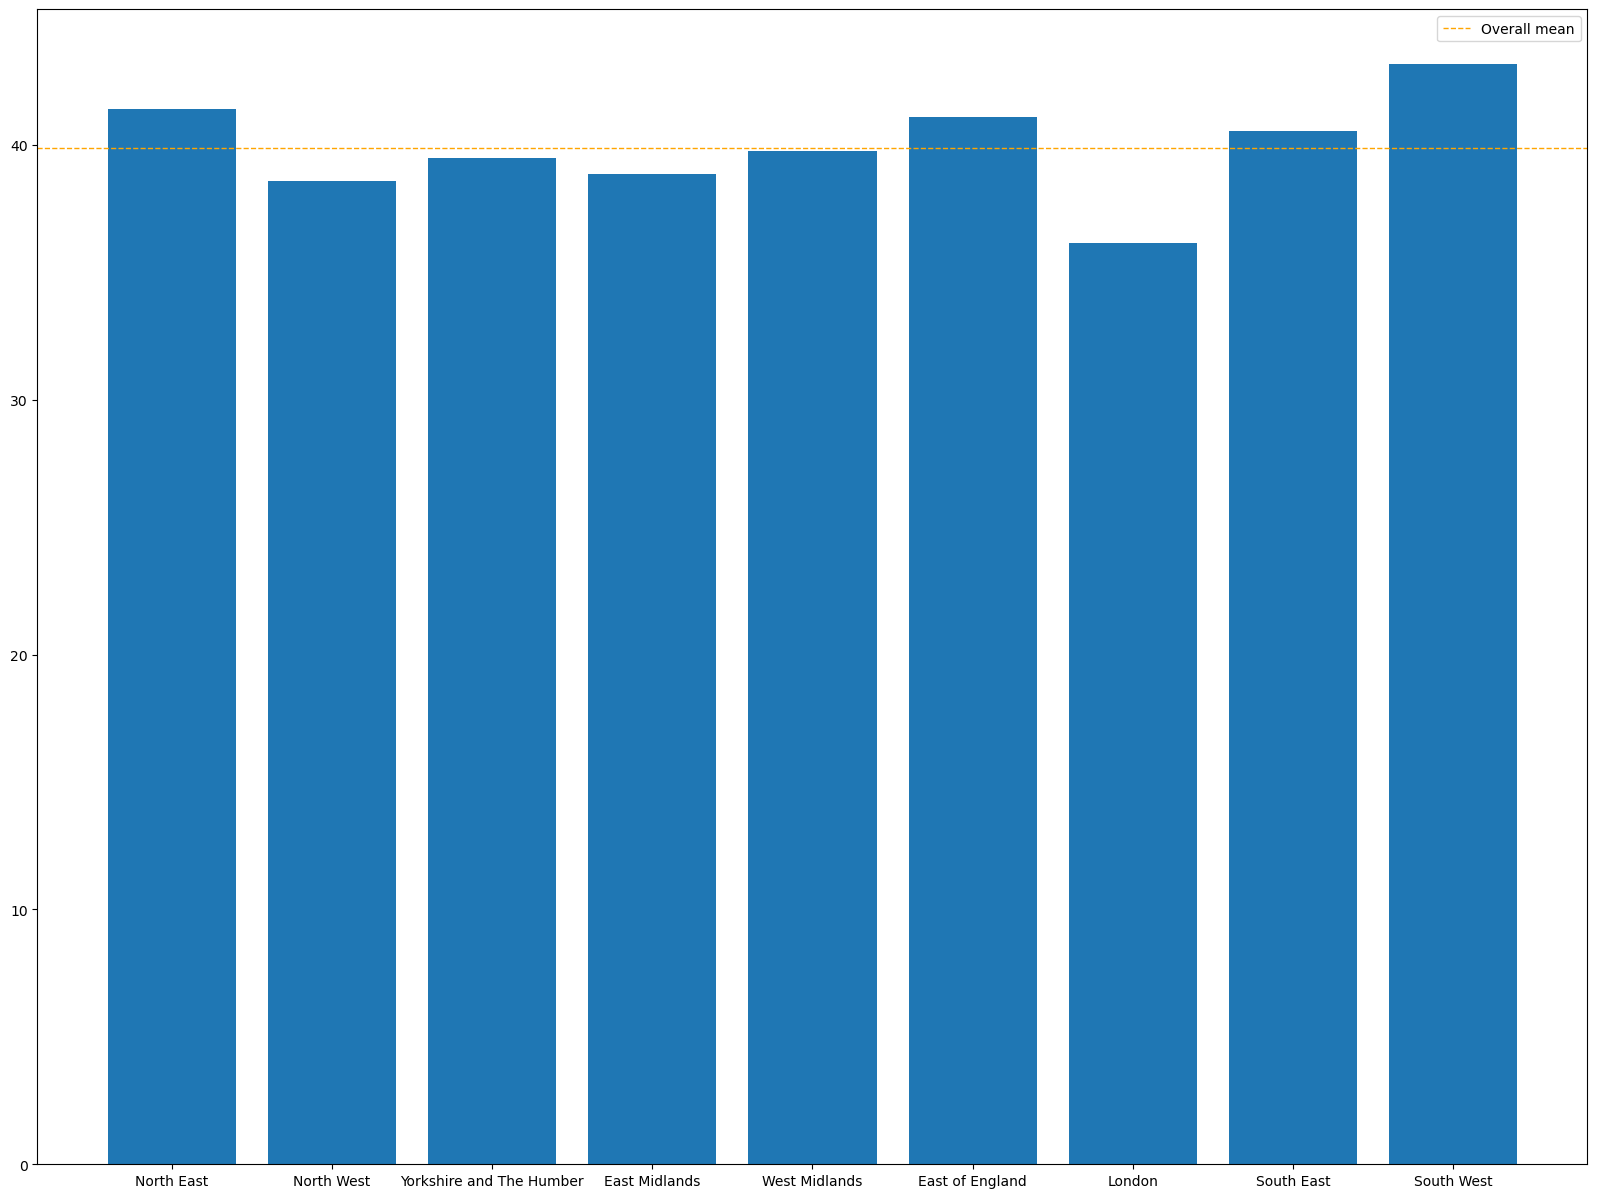

In [11]:
plt.figure(figsize = (20, 15))
plt.bar(sample_explore.columns,sample_explore.mean())
plt.axhline(y=sample_explore.mean().mean(),linewidth=1, color='orange', linestyle = '--', label = 'Overall mean')
plt.legend()

We can see that there are 4 regions with mean above the overall mean of the data

In [12]:
print(f"Overall mean is {sample_explore.mean().mean():.2f}")

Overall mean is 39.89


## State your hypothesis, and state the evidence that justifies it. (2 marks)

Null hypothesis : Mean difference between South West and London is equal to 7

Alternative hypothesis : Mean difference between South West and London is greater than 7

Alpha value chosen : 0.05 (or 95% significance)

The null hypothesis was chosen based on the calculation made above, as the difference from sample_explore is 7.004

## Plan the test. (3 marks)

I am interested to study the mean age between London and South West.

Test plan :
1. Establish the hypothesis
2. Establish the p-values
3. Calculate the test value (normalisation)
4. Establish the conclusion

- Mean value and standard deviation can be obtained with describe() method.
- z-value is calculated using the formula (mean_london - mean_southwest - 7) / SEM

As the samples (from both London and South West) are large (> 500), it is safe to assume that the data can be approximated to normal distribution hence I will be using z-test

## Perform the statistical test of the hypothesis. (5 marks)

In [13]:
print(f"Difference between southwest mean and london mean : {sample_test['South West'].mean()-sample_test['London'].mean():.2f}")

Difference between southwest mean and london mean : 7.83


In [14]:
sample_test.describe()

,Unnamed: 0,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,503.532000,38.932000,39.588000,38.358000,39.492000,40.616000,41.726000,35.682000,39.508000,43.512000
std,288.280259,23.091076,22.818405,22.774354,23.358192,24.075793,22.954056,21.966564,23.242167,24.755596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,254.250000,20.000000,20.000000,20.000000,20.000000,20.000000,24.000000,18.000000,20.000000,23.000000
50%,496.500000,39.000000,40.000000,38.000000,38.000000,42.000000,41.000000,34.000000,39.500000,44.000000
75%,759.750000,57.000000,57.000000,55.250000,58.000000,60.000000,60.000000,52.000000,59.000000,62.250000
max,999.000000,90.000000,99.000000,100.000000,90.000000,92.000000,97.000000,92.000000,93.000000,98.000000


In [15]:
import math

london_mean = sample_test["London"].mean()
southwest_mean = sample_test["South West"].mean()

london_var = sample_test["London"].var()
southwest_var = sample_test["South West"].var()

standard_error_mean = math.sqrt((london_var/500)+(southwest_var/500))
test_val = (southwest_mean - london_mean - 7) / standard_error_mean

print("The test value is : ", test_val)

The test value is :  0.5607674259917037


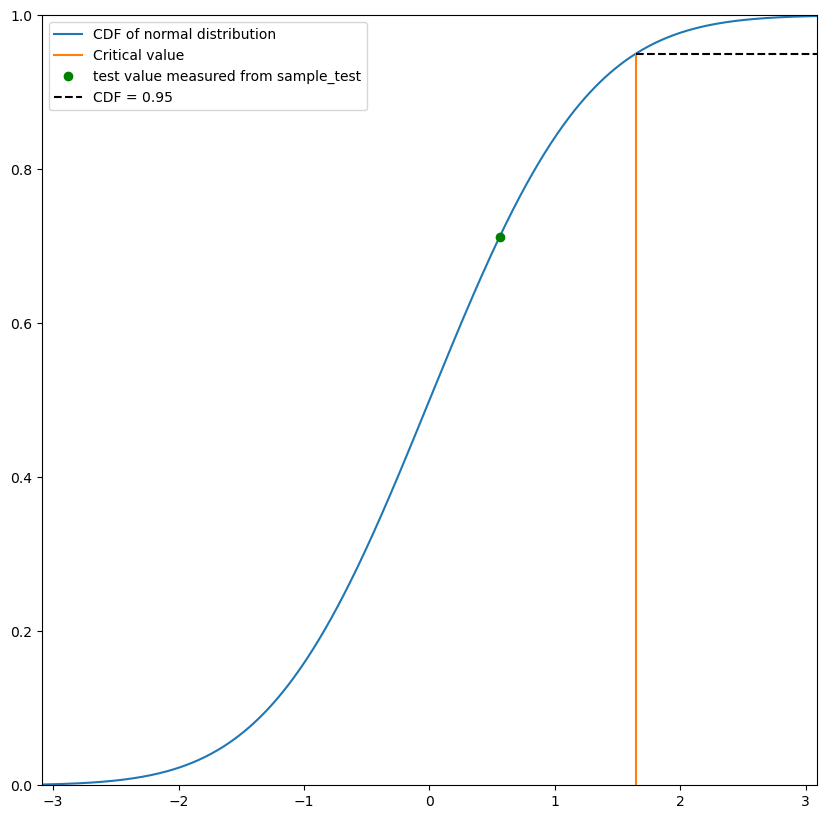

In [16]:
from scipy.stats import norm
import matplotlib.pyplot as plt

alpha = 0.05
p_value = 1 - norm.cdf(test_val) # for upper tail comparison

# plot the normal CDF
x = np.arange(norm.ppf(0.001, 0, 1), norm.ppf(0.999, 0, 1), 0.01)
plt.figure(figsize = (10,10))
plt.plot(x, norm.cdf(x, 0, 1), label = "CDF of normal distribution")

crit_val = norm.ppf(0.95, 0, 1)
alpha_plot = norm.cdf(crit_val, 0, 1)

# plotting the upper alpha limit
axes = plt.gca()
axes.set_xlim([x[0], x[len(x) - 1]])
axes.set_ylim([0, 1])
plt.plot([crit_val, crit_val], [0, alpha_plot], label = "Critical value")

# plotting the test_val
plt.plot(test_val, 1 - p_value, 'go', label = 'test value measured from sample_test')
plt.plot([crit_val, x[len(x) - 1]], [0.95, 0.95], '--', label = 'CDF = 0.95', color = 'black')

# show legend
plt.legend()

## Conclusions. (2 Marks) 

Using classical statistics, I found out that the null hypothesis cannot be ruled out at 95%.